In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pickle
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('/kaggle/input/shimla-temp/shimla.csv')

In [3]:
#checking columns
data.columns

Index(['Date', 'PS', 'PSC', 'T2M', 'T2MWET', 'T2MDEW'], dtype='object')

In [4]:
#dropping unrequired features
data=data.drop(['T2MDEW', 'T2MWET', 'PS', 'PSC'], axis=1)

In [ ]:
# convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')
data.head()

,Date,T2M
0,2004-01-01 05:00:00,6.63
1,2004-01-01 06:00:00,7.09
2,2004-01-01 07:00:00,8.27
3,2004-01-01 08:00:00,11.80
4,2004-01-01 09:00:00,14.57


In [6]:
#changing index to date
data.index = data['Date']
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,6.63
2004-01-01 06:00:00,2004-01-01 06:00:00,7.09
2004-01-01 07:00:00,2004-01-01 07:00:00,8.27
2004-01-01 08:00:00,2004-01-01 08:00:00,11.80
2004-01-01 09:00:00,2004-01-01 09:00:00,14.57


In [7]:
data=data.sort_index()

In [8]:
data.head()

,Date,T2M
Date,,
2004-01-01 05:00:00,2004-01-01 05:00:00,6.63
2004-01-01 06:00:00,2004-01-01 06:00:00,7.09
2004-01-01 07:00:00,2004-01-01 07:00:00,8.27
2004-01-01 08:00:00,2004-01-01 08:00:00,11.80
2004-01-01 09:00:00,2004-01-01 09:00:00,14.57


In [9]:
data.count()

Date    175320
T2M     175320
dtype: int64

In [10]:
#Renaming columns
data.rename(columns={'T2M': 'TEMP'}, inplace=True)

In [11]:
# Splitting data into train and test sets
train_data = data[:-120]  # Use all data except the last 48 hours for training
test_data = data[-120:]   # Use the last 48 hours for testing

In [12]:
# SARIMA model parameters
order = (1, 1, 1)  # ARIMA parameters (p, d, q)
seasonal_order = (1, 1, 1, 24)  # SARIMA parameters (P, D, Q, S)

In [13]:
check=train_data[:8760] #1 year data
test=train_data[8760:8772] #0.5 days = 12 hours

In [15]:
#to store RMSE after every year
rmse_record={}

In [16]:
# Fit SARIMA model
shimla_model = SARIMAX(check["TEMP"], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False, dates=check["Date"])
shimla_result = shimla_model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10285D-01    |proj g|=  5.10455D-01


 This problem is unconstrained.



At iterate    5    f=  3.69388D-01    |proj g|=  4.92910D-01

At iterate   10    f=  3.49607D-01    |proj g|=  2.69638D-03

At iterate   15    f=  3.49606D-01    |proj g|=  4.41445D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     27      1     0     0   5.660D-07   3.496D-01
  F =  0.34960587939646165     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [17]:
# Forecast temperatures for the next 48 hours
forecast = shimla_result.get_forecast(steps=12)

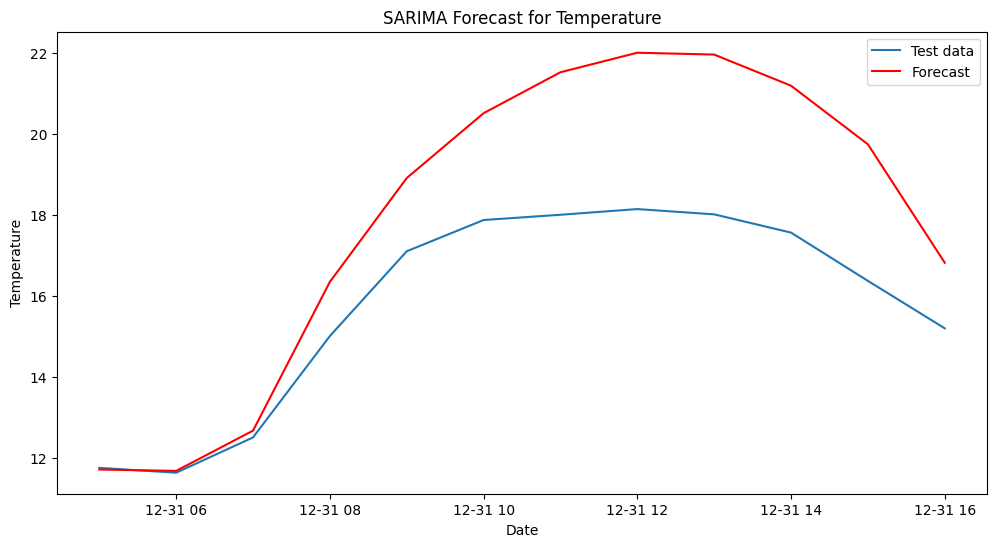

In [18]:
# Plot the predicted values along with the actual values
plt.figure(figsize=(12, 6))
#plt.plot(check.index, check["TEMP"], label='Train data')
plt.plot(test.index, test["TEMP"], label='Test data')
plt.plot(forecast.predicted_mean, label='Forecast', color='red')
#plt.plot(forecast.index, forecast.predicted_mean, label='Forecast', color='red')
#plt.fill_between(forecast.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.5)
plt.title('SARIMA Forecast for Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [19]:
rmse = np.sqrt(mean_squared_error(test["TEMP"], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')
rmse_record[1]=rmse

Root Mean Squared Error (RMSE): 2.6108863314411233


In [20]:
table=[8760*x for x in range(1, 21)]

training now:  2


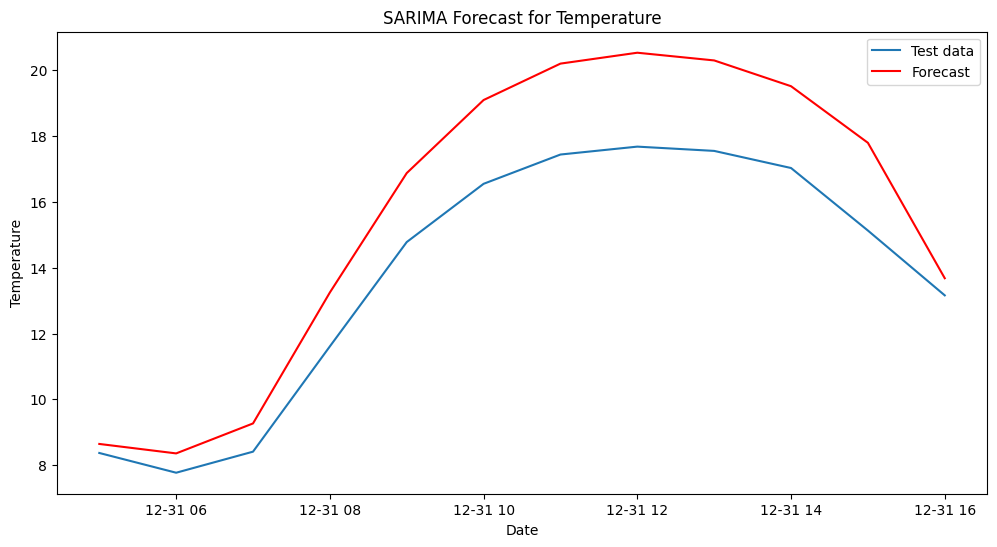

Root Mean Squared Error (RMSE): 2.073902508166581
training now:  3


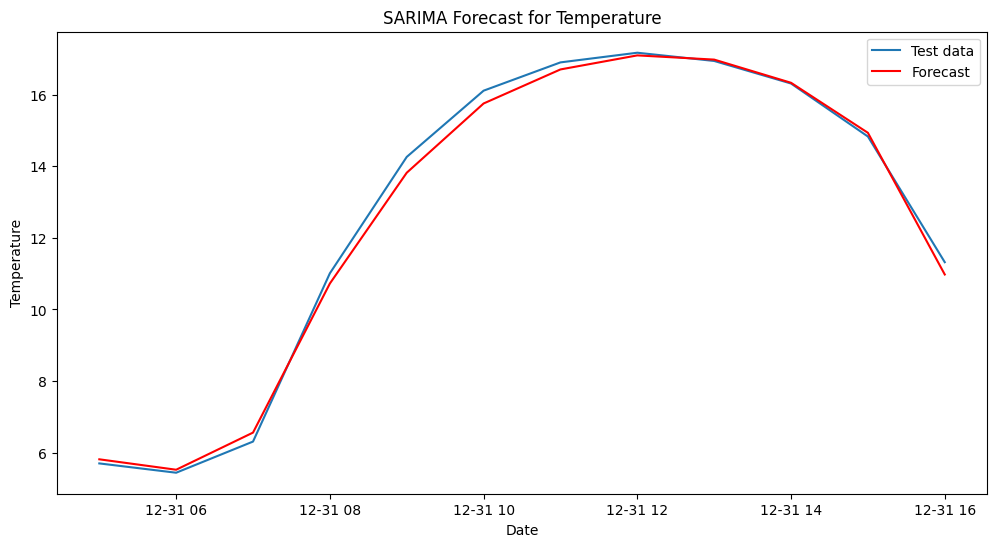

Root Mean Squared Error (RMSE): 0.23492948014220907
training now:  4


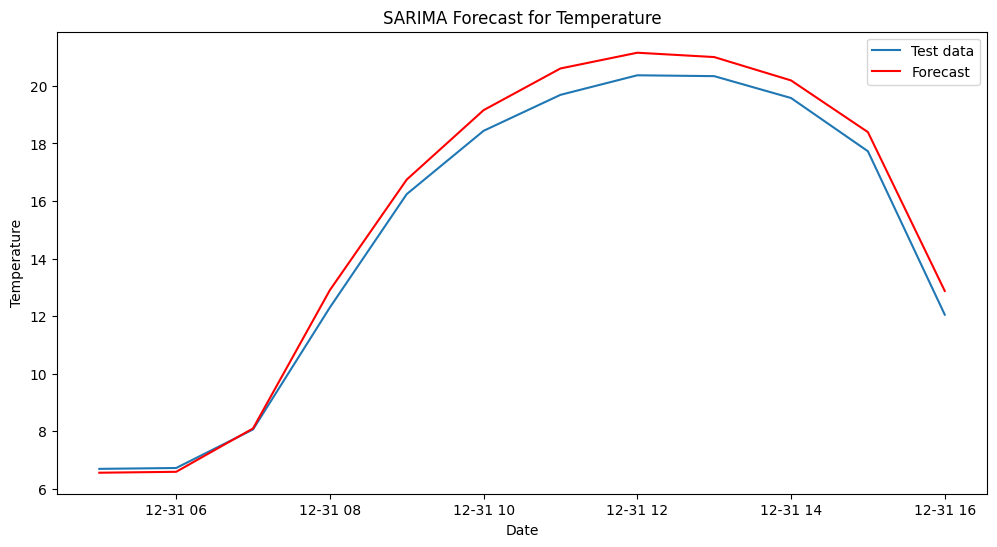

Root Mean Squared Error (RMSE): 0.6166545539032751
training now:  5


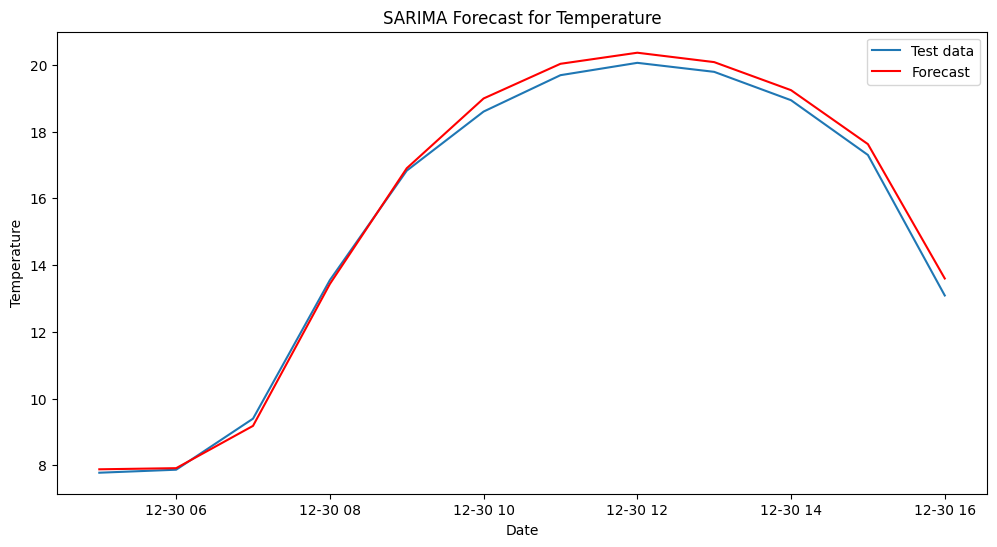

Root Mean Squared Error (RMSE): 0.2858591349419853
training now:  6


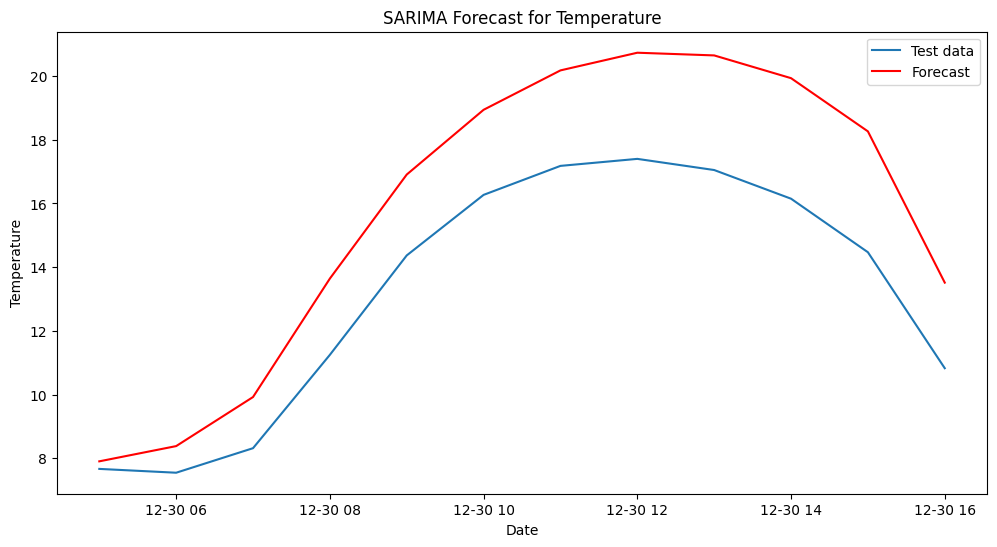

Root Mean Squared Error (RMSE): 2.7623750894874854
training now:  7


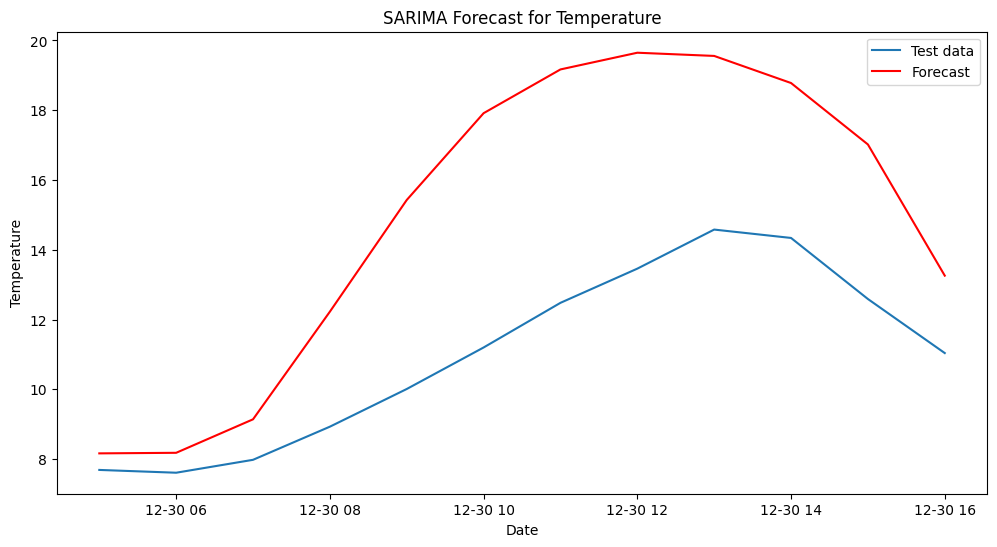

Root Mean Squared Error (RMSE): 4.466157297850756
training now:  8


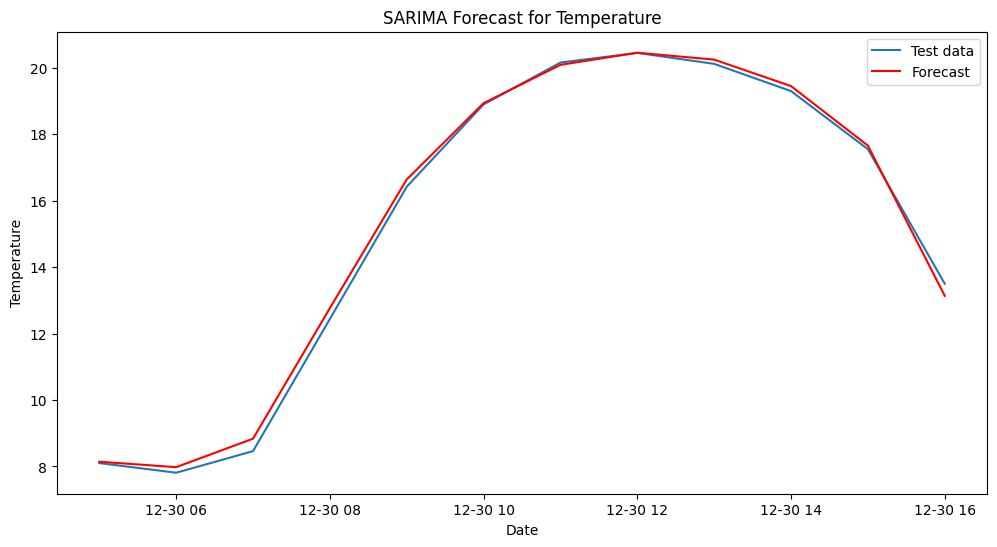

Root Mean Squared Error (RMSE): 0.2069935843733759
training now:  9


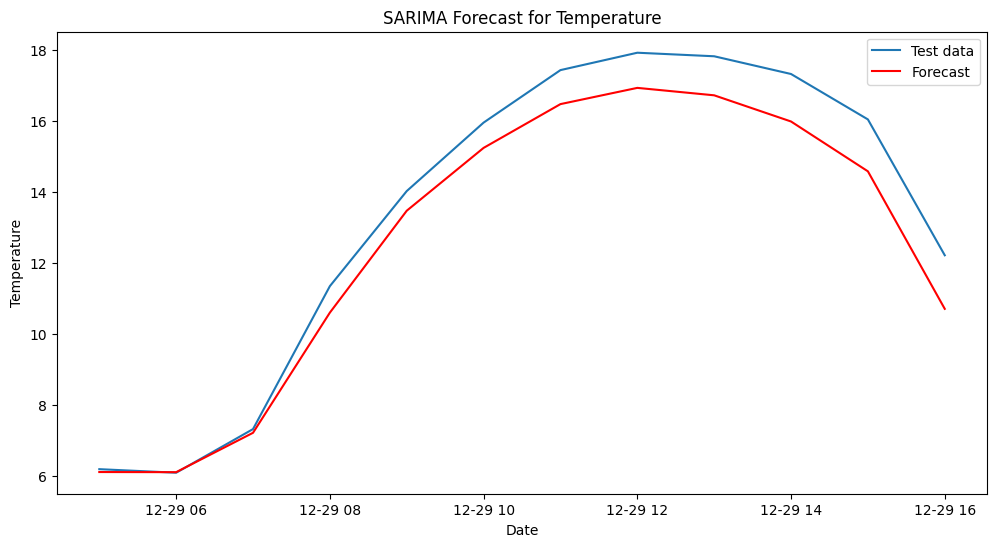

Root Mean Squared Error (RMSE): 0.945075378750478
training now:  10


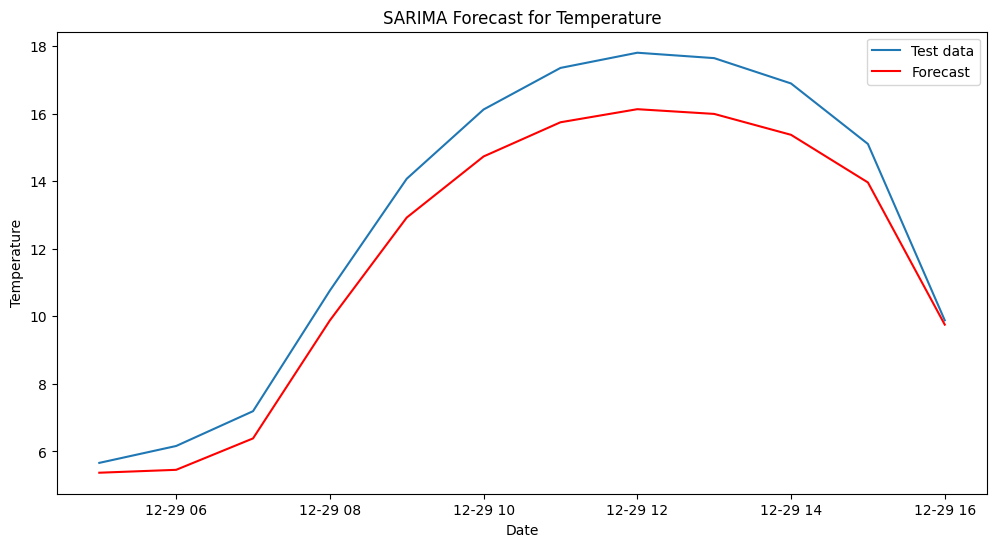

Root Mean Squared Error (RMSE): 1.1901273134907628
training now:  11


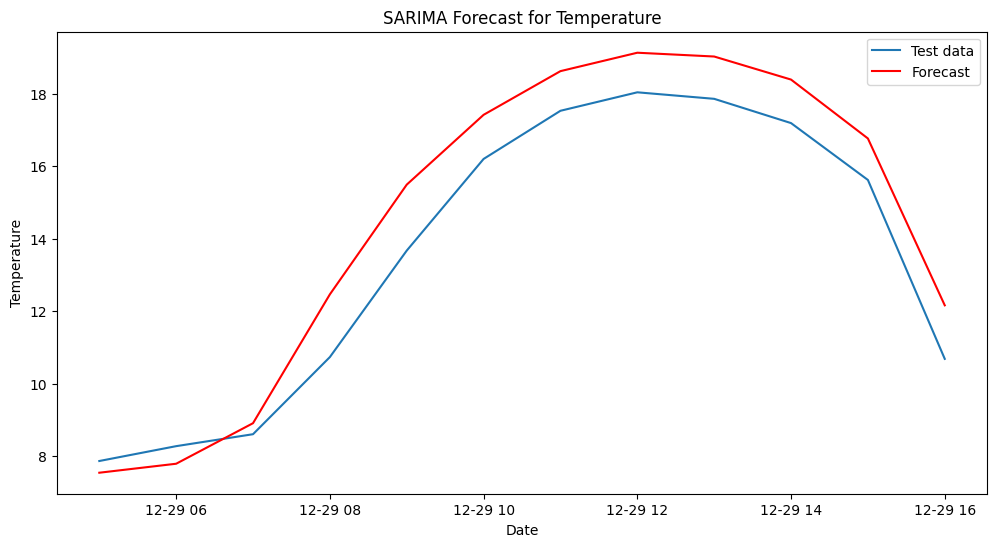

Root Mean Squared Error (RMSE): 1.187765388212421
training now:  12


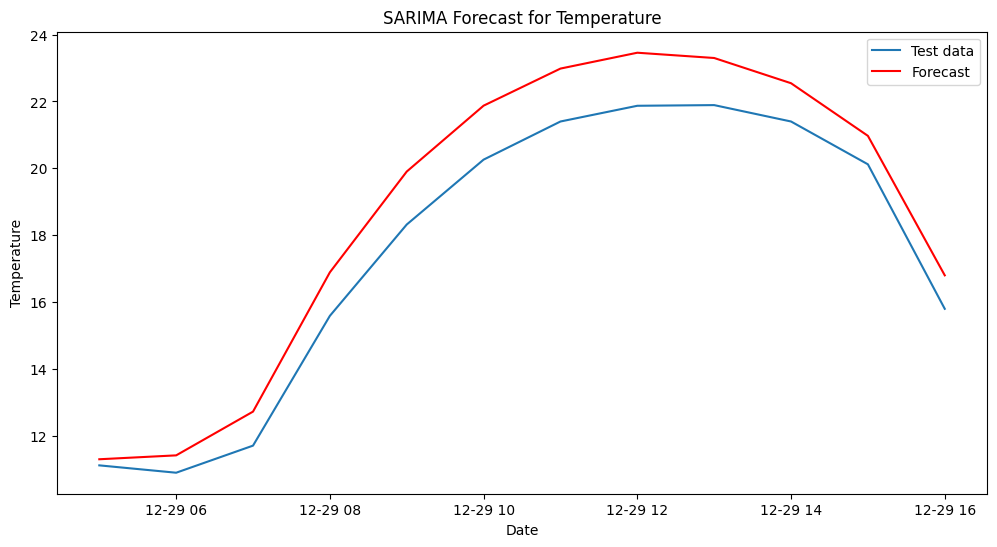

Root Mean Squared Error (RMSE): 1.2308221987761254
training now:  13


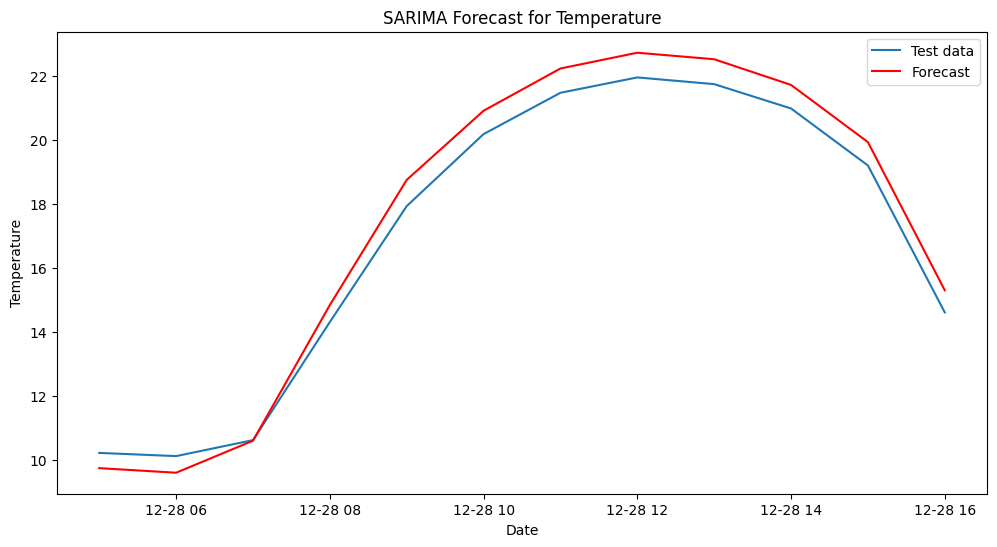

Root Mean Squared Error (RMSE): 0.665066512605099
training now:  14


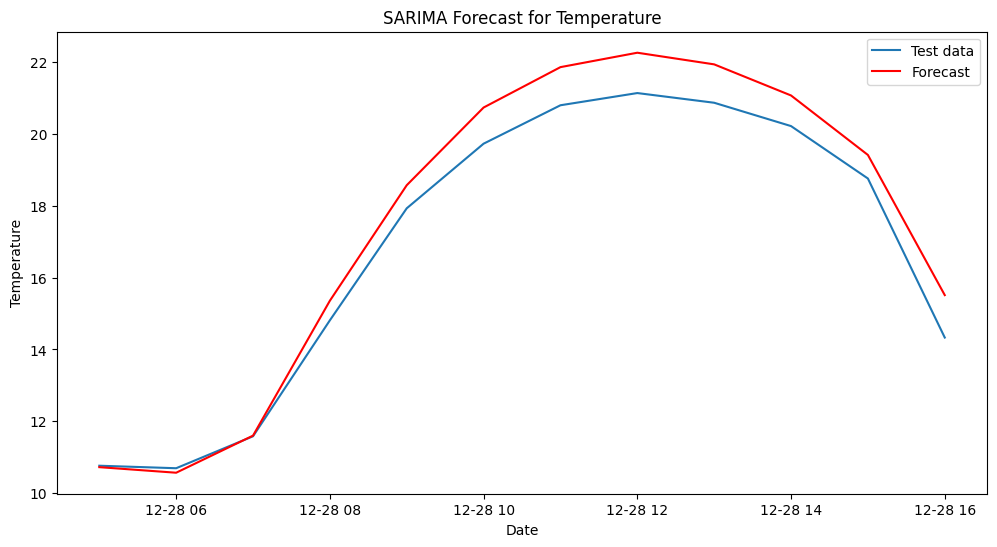

Root Mean Squared Error (RMSE): 0.80780915516614
training now:  15


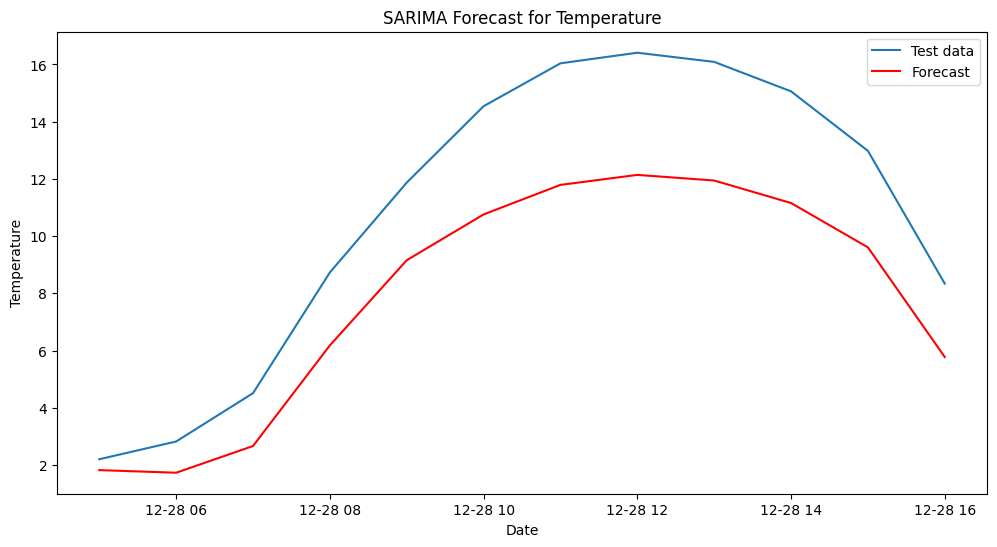

Root Mean Squared Error (RMSE): 3.1573361822067327
training now:  16


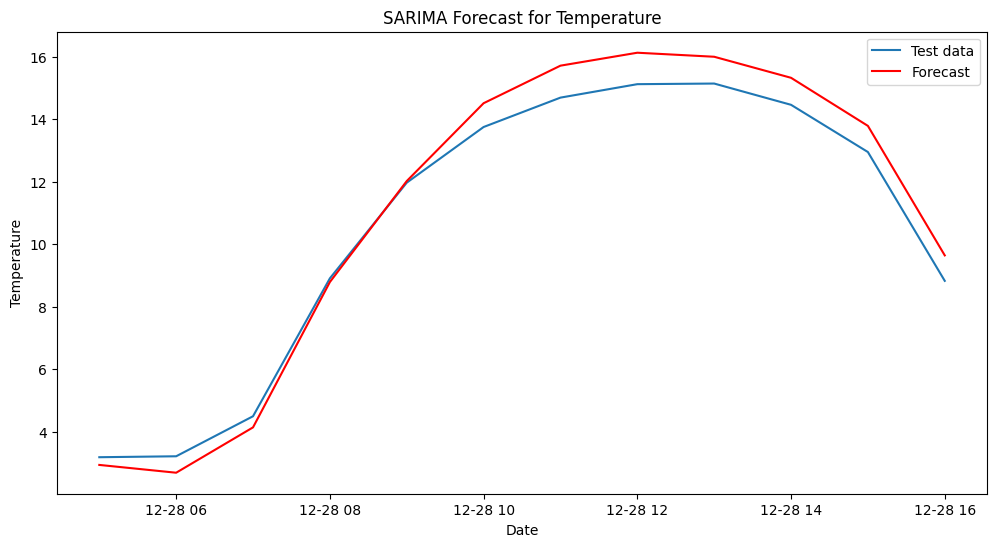

Root Mean Squared Error (RMSE): 0.7046520249830889
training now:  17


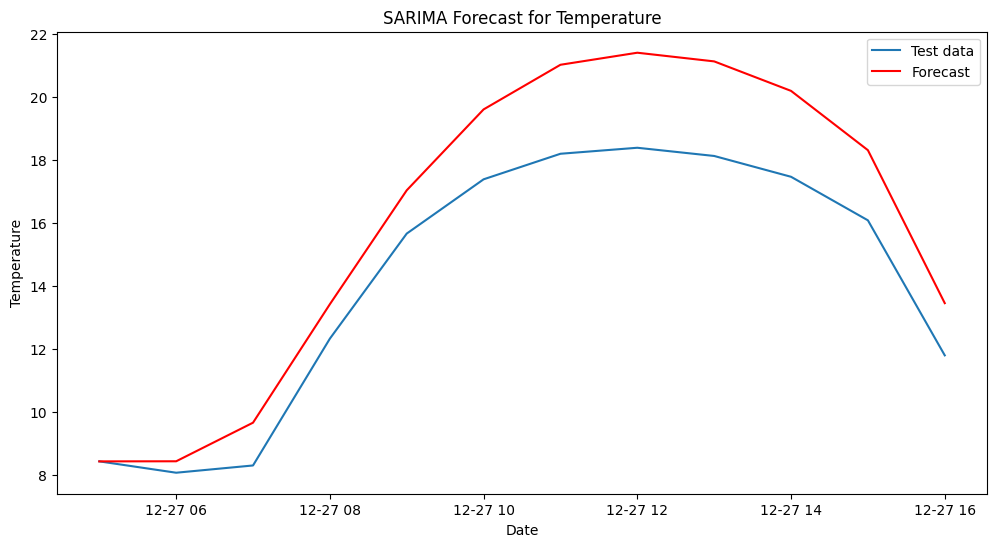

Root Mean Squared Error (RMSE): 2.0629808372715863
training now:  18


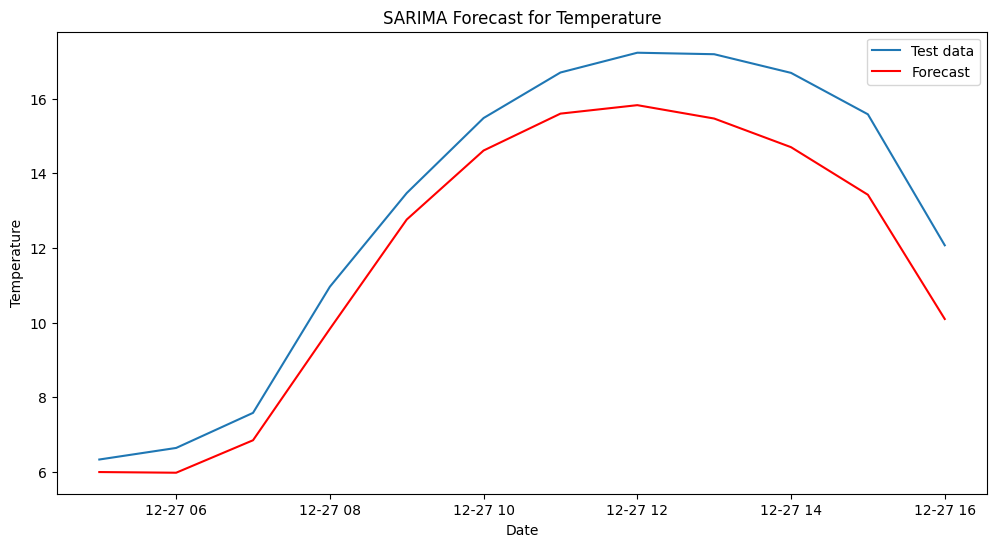

Root Mean Squared Error (RMSE): 1.3632004368218247
training now:  19


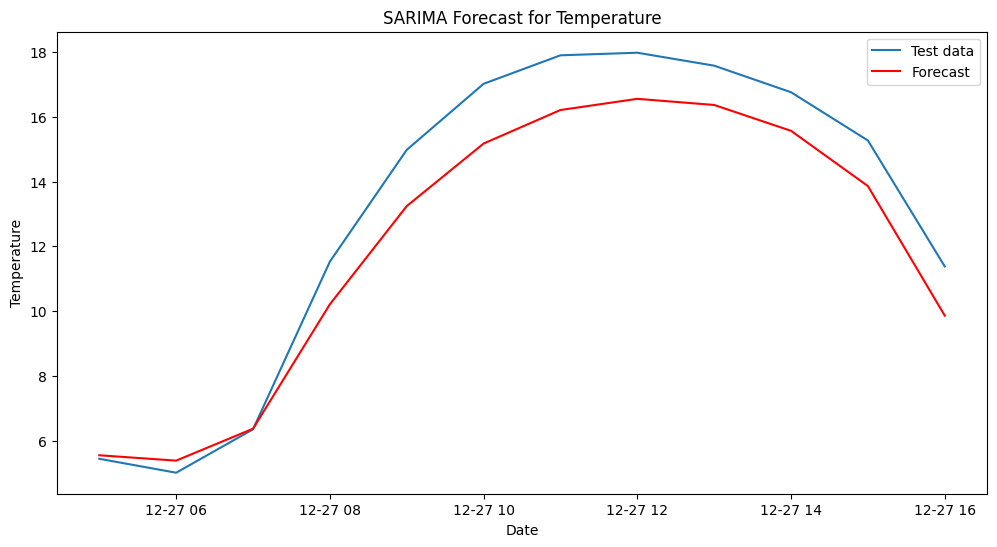

Root Mean Squared Error (RMSE): 1.3029579305036083
training now:  20


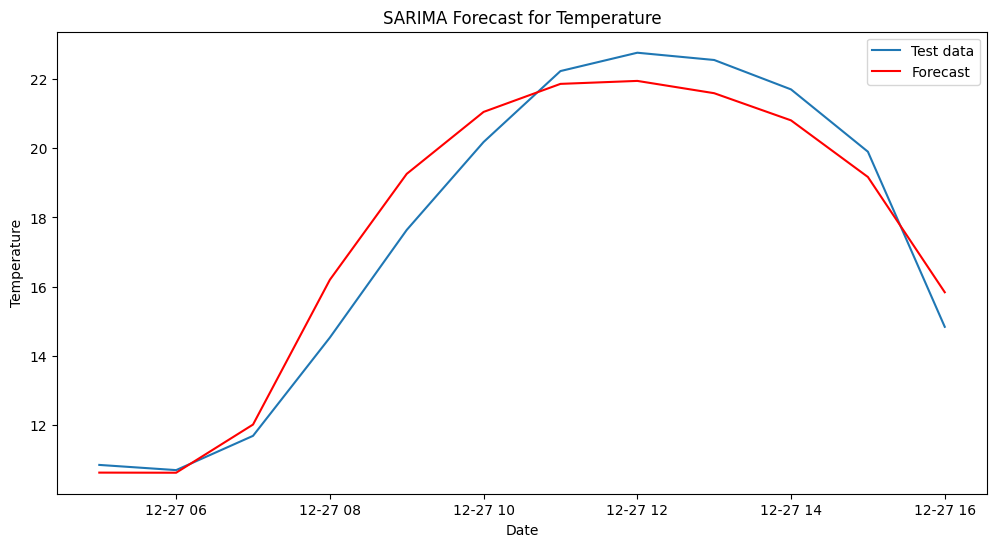

Root Mean Squared Error (RMSE): 0.9302391893712797


In [21]:
for i in range(2, 21):
    check2=train_data[table[i-2]:table[i-1]]
    test2= test_data[:12] if i==20 else train_data[table[i-1]:table[i-1]+12]# 0.5 days = 12 hours
    print("training now: ", i)
    #training
    shimla_result=shimla_result.extend(check2["TEMP"])
    #forecasting
    forecast2 = shimla_result.get_forecast(steps=12)
    # Plot the predicted values along with the actual values
    plt.figure(figsize=(12, 6))
    plt.plot(test_data[:12].index, test_data[:12]["TEMP"], label='Test data') if i==20 else plt.plot(test2.index, test2["TEMP"], label='Test data')
    plt.plot(forecast2.predicted_mean, label='Forecast', color='red')
    plt.title('SARIMA Forecast for Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()
    #RMSE
    rmse = np.sqrt(mean_squared_error(test_data[:12]["TEMP"], forecast2.predicted_mean))if i==20 else np.sqrt(mean_squared_error(test2["TEMP"], forecast2.predicted_mean))
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    # to store RMSE for every year
    rmse_record[i] = rmse

In [22]:
rmse_record

{1: 2.6108863314411233,
 2: 2.073902508166581,
 3: 0.23492948014220907,
 4: 0.6166545539032751,
 5: 0.2858591349419853,
 6: 2.7623750894874854,
 7: 4.466157297850756,
 8: 0.2069935843733759,
 9: 0.945075378750478,
 10: 1.1901273134907628,
 11: 1.187765388212421,
 12: 1.2308221987761254,
 13: 0.665066512605099,
 14: 0.80780915516614,
 15: 3.1573361822067327,
 16: 0.7046520249830889,
 17: 2.0629808372715863,
 18: 1.3632004368218247,
 19: 1.3029579305036083,
 20: 0.9302391893712797}

In [ ]:
#saving pickle file of model
with open("/kaggle/working/shimla_model.pkl", 'wb') as f:
    pickle.dump(shimla_result, f)

In [23]:
forecast2 = shimla_result.get_forecast(steps=12)

In [24]:
forecast2.predicted_mean

2023-12-27 05:00:00    10.627557
2023-12-27 06:00:00    10.624499
2023-12-27 07:00:00    12.016273
2023-12-27 08:00:00    16.200022
2023-12-27 09:00:00    19.259888
2023-12-27 10:00:00    21.049761
2023-12-27 11:00:00    21.859683
2023-12-27 12:00:00    21.945703
2023-12-27 13:00:00    21.590409
2023-12-27 14:00:00    20.805208
2023-12-27 15:00:00    19.169593
2023-12-27 16:00:00    15.838915
Freq: h, Name: predicted_mean, dtype: float64

In [25]:
type(forecast2.predicted_mean)

pandas.core.series.Series

In [ ]:
d